['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


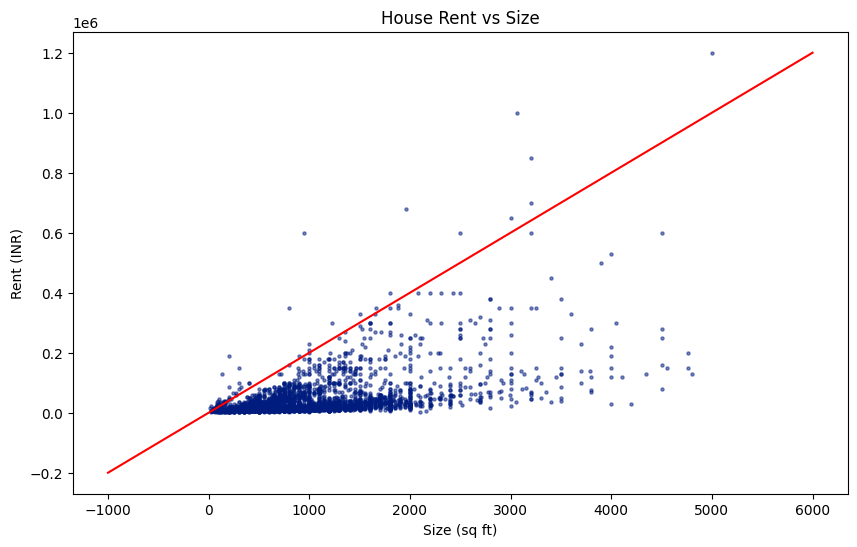

In [1]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

file = "House_Rent_Dataset.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "iamsouravbanerjee/house-rent-prediction-dataset", file)
cropped_df = df[["Rent", "Size"]].query('Rent <= 2000000 and Size <= 5000')

m = 200
b = 1
x_line = np.linspace(-1000, 6000)
y_line = m * x_line + b

# Plotting the data
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(10, 6))
plt.scatter(cropped_df["Size"], cropped_df["Rent"], alpha=0.5, s=5)
plt.title("House Rent vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (INR)")
plt.plot(x_line, y_line, color='red', label='y = mx + b')
plt.show()

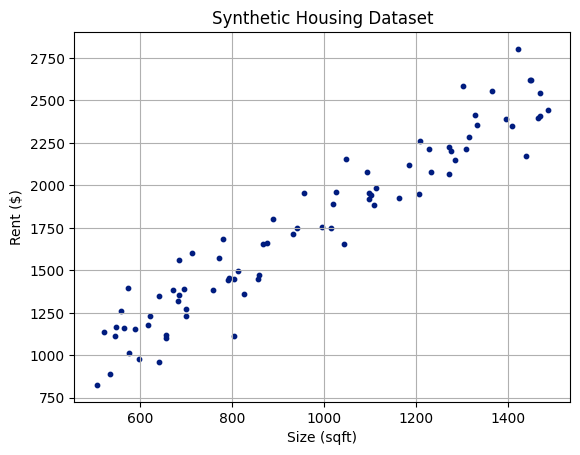

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# === Parameters for the data generation ===
n_samples = 80

# Size of the apartment (in square feet): uniformly between 500 and 1500
size = np.random.uniform(500, 1500, n_samples)

# Assume rent = 1.5 * size + 300 + noise
true_w = 1.5   # $ per square foot
true_b = 300   # base rent
noise = np.random.normal(0, 150, n_samples)  # noise with standard deviation of 100

rent = true_w * size + true_b + noise

# Optional: plot the data
plt.scatter(size, rent, s=10)
plt.title("Synthetic Housing Dataset")
plt.xlabel("Size (sqft)")
plt.ylabel("Rent ($)")
plt.grid(True)
plt.show()
